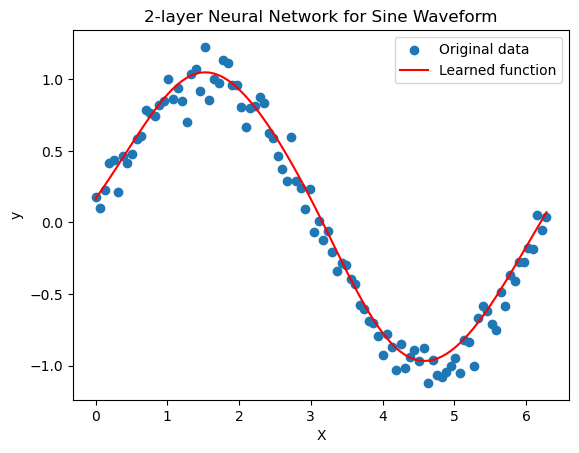

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creating synthetic dataset - Sine waveform with noise
np.random.seed(0)
X = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)

# Define neural network architecture
input_size = 1
hidden_size = 10
output_size = 1
learning_rate = 0.1
epochs = 30000

# Initialize parameters
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Define activation function (sigmoid for hidden layer, linear for output layer)
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward propagation
def forward(X):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    return z2, a1

# Loss function (mean squared error)
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

# Backward propagation
def backward(X, y_pred, y_true, a1, W1, b1, W2, b2):
    m = X.shape[0]
    dz2 = 2 * (y_pred - y_true) / m
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * a1 * (1 - a1)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update parameters
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

# Training loop
losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred, a1 = forward(X)
    
    # Compute and store loss
    loss = mse_loss(y_pred, y)
    losses.append(loss)
    
    # Backpropagation
    backward(X, y_pred, y, a1, W1, b1, W2, b2)

# Plot the original data and the learned function
plt.scatter(X, y, label='Original data')
plt.plot(X, y_pred, color='red', label='Learned function')
plt.xlabel('X')
plt.ylabel('y')
plt.title('2-layer Neural Network for Sine Waveform')
plt.legend()
plt.show()


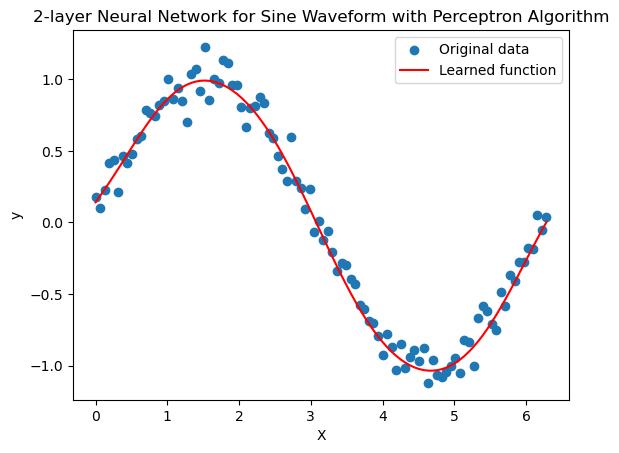

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Creating synthetic dataset - Sine waveform with noise
np.random.seed(0)
X = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)

# Define neural network architecture
input_size = 1
hidden_size = 4
output_size = 1
learning_rate = 0.1
epochs = 30000

# Initialize parameters
W1 = np.random.randn(input_size, hidden_size)
b1 = np.zeros((1, hidden_size))
W2 = np.random.randn(hidden_size, output_size)
b2 = np.zeros((1, output_size))

# Define activation function (tanh for hidden layer, linear for output layer)
def tanh(x):
    return np.tanh(x)

def linear(x):
    return x

# Forward propagation
def forward(X, W1, b1, W2, b2):
    z1 = np.dot(X, W1) + b1
    a1 = tanh(z1)
    z2 = np.dot(a1, W2) + b2
    return z2, a1

# Loss function (mean squared error)
def mse_loss(y_pred, y_true):
    return np.mean((y_pred - y_true) ** 2)

# Backward propagation
def backward(X, y_pred, y_true, a1, W1, b1, W2, b2):
    m = X.shape[0]
    dz2 = 2 * (y_pred - y_true) / m
    dW2 = np.dot(a1.T, dz2)
    db2 = np.sum(dz2, axis=0, keepdims=True)
    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * (1 - a1**2)
    dW1 = np.dot(X.T, dz1)
    db1 = np.sum(dz1, axis=0, keepdims=True)

    # Update parameters
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    return W1, b1, W2, b2

# Training loop
losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred, a1 = forward(X, W1, b1, W2, b2)
    
    # Compute and store loss
    loss = mse_loss(y_pred, y)
    losses.append(loss)
    
    # Backpropagation
    W1, b1, W2, b2 = backward(X, y_pred, y, a1, W1, b1, W2, b2)

# Plot the original data and the learned function
plt.scatter(X, y, label='Original data')
plt.plot(X, y_pred, color='red', label='Learned function')
plt.xlabel('X')
plt.ylabel('y')
plt.title('2-layer Neural Network for Sine Waveform with Perceptron Algorithm')
plt.legend()
plt.show()


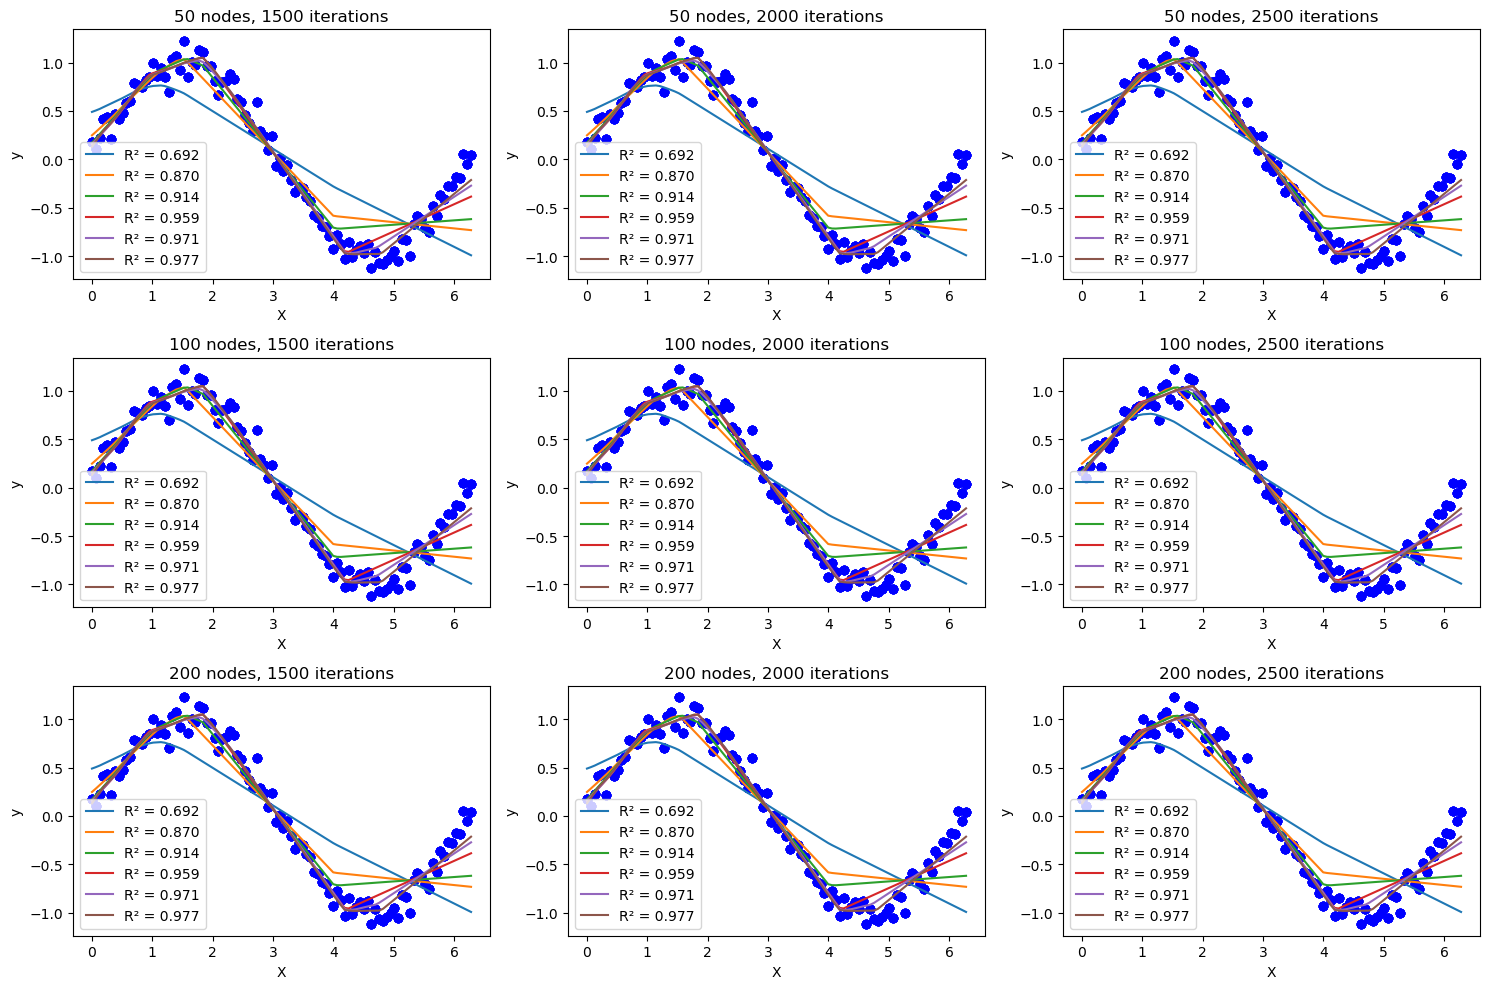

In [9]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

# Creating synthetic dataset - Sine waveform with noise
np.random.seed(0)
X = np.linspace(0, 2*np.pi, 100).reshape(-1, 1)
y = np.sin(X) + 0.1 * np.random.randn(100, 1)

# Define a function to train and evaluate MLP with different configurations
def train_and_evaluate_MLP(ax, nodes, iterations, layers):
    # Initialize and train MLP model
    model = MLPRegressor(hidden_layer_sizes=layers, max_iter=iterations, random_state=42)
    model.fit(X, y.ravel())
    
    # Predict using the trained model
    y_pred = model.predict(X)
    
    # Calculate R^2 score
    r2 = r2_score(y, y_pred)
    
    # Plot the actual vs predicted values
    ax.scatter(X, y, color='blue',)
    ax.plot(X, y_pred, label=f'R\u00B2 = {r2:.3f}')
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_title(f'{nodes} nodes, {iterations} iterations')
    ax.legend()

# Experiment with different configurations
nodes_list = [50, 100, 200]  # Increased number of nodes in the hidden layers
iterations_list = [1500, 2000, 2500]  # Increased number of iterations
layers_list = [(50,), (100,), (200,), (50, 50), (100, 100), (200, 200)]  # Deeper architectures


fig, axes = plt.subplots(len(nodes_list), len(iterations_list), figsize=(15, 10))

for i, nodes in enumerate(nodes_list):
    for j, iterations in enumerate(iterations_list):
        for k, layers in enumerate(layers_list):
            ax = axes[i, j]
            train_and_evaluate_MLP(ax, nodes, iterations, layers)

plt.tight_layout()
plt.show()


In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Retrieve the data set
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
column_names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
iris_data = pd.read_csv(url, names=column_names)

# Select relevant features and target
X = iris_data.iloc[:100, [0, 2]].values  # Features: sepal length and petal length
y = np.where(iris_data.iloc[:100, 4] == 'Iris-setosa', -1, 1)  # Target: Iris-setosa: -1, Iris-versicolor: 1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, train_size=30, random_state=42)

# Develop a Perceptron algorithm
learning_rate = 0.01
perceptron = Perceptron(eta0=learning_rate, random_state=42)
perceptron.fit(X_train, y_train)

# Check the algorithm prediction with the test data set
y_pred = perceptron.predict(X_test)
misclassifications = (y_test != y_pred).sum()

print("Number of misclassifications in the test set:", misclassifications)
print("Accuracy:", accuracy_score(y_test, y_pred))



Number of misclassifications in the test set: 0
Accuracy: 1.0
